In [1]:
#conda create -n 2020 python=3.6
#conda install matplotlib scikit-learn pandas jupyterlab
#https://www.kaggle.com/c/titanic/data
%matplotlib inline
import pandas as pd

In [2]:
df_train=pd.read_csv('train.csv')

In [3]:
#df_train.head()

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5eac381908>,
      dtype=object)

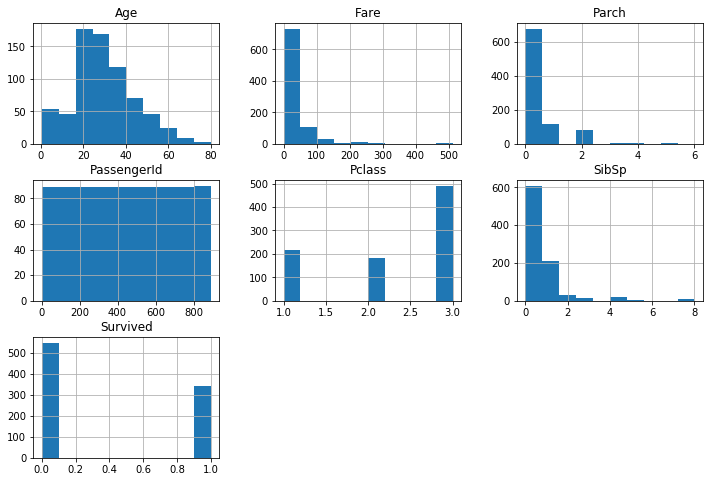

In [5]:
df_train.hist(figsize=(12,8))

```
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object

Drop Column: PassengerId, Name, Ticket, Cabin
Drop Row: Age, Embarked
Convert Categorical data to numeric data: Sex, Embarked
```

In [6]:
#Drop Column: PassengerId, Name, Ticket, Cabin
df1=df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)

In [7]:
df1.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [8]:
#Drop Row: Age, Embarked
df2=df1.dropna()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [10]:
%%timeit -n1
pd.options.mode.chained_assignment = None
df3=df2
df3.loc[:,'sex_cat_old']=0
df3.loc[df3.Sex=='male','sex_cat_old']=1
#df3.head()

2.04 ms ± 571 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%%timeit -n1
df4=df2
df4.loc[:,'sex_cat']=df4['Sex'].astype('category').cat.codes
#df4.head()

1.81 ms ± 681 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
df4=df2
df4['sex_cat']=df4['Sex'].astype('category').cat.codes
df4['embarked_cat']=df4['Embarked'].astype('category').cat.codes

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      712 non-null    int64  
 1   Pclass        712 non-null    int64  
 2   Sex           712 non-null    object 
 3   Age           712 non-null    float64
 4   SibSp         712 non-null    int64  
 5   Parch         712 non-null    int64  
 6   Fare          712 non-null    float64
 7   Embarked      712 non-null    object 
 8   sex_cat_old   712 non-null    int64  
 9   sex_cat       712 non-null    int8   
 10  embarked_cat  712 non-null    int8   
dtypes: float64(2), int64(5), int8(2), object(2)
memory usage: 57.0+ KB


In [14]:
header=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_cat', 'embarked_cat']
df5=df4[header]
df5.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex_cat,embarked_cat
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2


In [15]:
yx=df5.to_numpy()

In [16]:
yx

array([[ 0.    ,  3.    , 22.    , ...,  7.25  ,  1.    ,  2.    ],
       [ 1.    ,  1.    , 38.    , ..., 71.2833,  0.    ,  0.    ],
       [ 1.    ,  3.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  1.    , 19.    , ..., 30.    ,  0.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
       [ 0.    ,  3.    , 32.    , ...,  7.75  ,  1.    ,  1.    ]])

In [17]:
yx.shape

(712, 8)

In [18]:
X_train=yx[:,1:]
y_train=yx[:,0]

In [19]:
X_train.shape

(712, 7)

In [20]:
y_train.shape

(712,)

# Supervised Learning

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [23]:
import numpy as np
from sklearn.model_selection import cross_val_score
np.average( cross_val_score(clf, X_train, y_train, cv=5) )
#do not use training set for evaluation

0.7654880330936669

In [24]:
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_cat', 'embarked_cat']
X_train[:5,:]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ,  2.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,  2.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,  2.    ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  1.    ,  2.    ]])

In [25]:
clf.predict(X_train[:5,:])

array([0., 1., 1., 1., 0.])

In [26]:
#Jack
clf.predict([[3,24,0,0,0,1,0]])

array([0.])

In [27]:
#Rose
clf.predict([[1,23,1,1,10,0,0]])

array([1.])

# Save model

In [28]:
import pickle
filename = 'titanic.model'
pickle.dump(clf, open(filename, 'wb'))

In [29]:
#reading model for prediction
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_train[:5,:])

array([0., 1., 1., 1., 0.])